# Perkenalan

```
=================================================
Graded Challenge 4

Nama  : Aditya Pramana Putra
Batch : HCK-7

Tujuan projek untuk memprediksi harga perjalanan platform uber dan lyft di Boston,Amerika Serikat.
=================================================

```

**Latar belakang**

Anda adalah seorang data scientist di perusahaan ABC yang bergerak dibidang transportasi diantaranya adalah Uber dan Lyft.Atasan anda meminta anda untuk membuat model untuk memprediksi biaya perjalanan yang akan di dapat dalam satu bulan.Atasan anda meminta anda membuat model regression menggunakan linear regression untuk memprediksi harga perjalanan tersebut karena linear regression salah satu metode yang paling umum digunakan dalam analisis data dan pemodelan prediktif.


**Problem Statement**

Tujuannya adalah untuk memprediksi biaya perjalanan pada transportasi Uber dan Lyft dengan target meningkatkan 5% pendapatan perusahaan ABC dalam satu bulan.Hal ini dapat dicapai dengan memprediksi faktor-faktor yang mempengaruhi harga perjalanan dengan model regression menggunakan model regresi linear sederhana

# Import library

In [1]:
# Untuk membaca dan membuat dataframe
import pandas as pd

# persiapkan array untuk menghitung perhitungan kuadrat matematika
import numpy as np

# Untuk membuat visualisasi data pada EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Untuk menyimpan model
import pickle

# Untuk membagi data train dan split dalam seleksi model
from sklearn.model_selection import train_test_split

# method untuk memasukan/imputasi nilai kedalam missing value
from sklearn.impute import SimpleImputer

# method untuk melakukan caping outlier
from feature_engine.outliers import Winsorizer

# Untuk melakukan preprocessing fitur transformasi
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,StandardScaler

# Untuk melakukan pengecekan uji asumsi Linear regresi
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# membuat model linear regresi
from sklearn.linear_model import LinearRegression

# Untuk model evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

#Untuk mengabaikan fitur peringatan 
import warnings
warnings.filterwarnings('ignore')


# Data Loading

In [2]:
# Membaca file
data = pd.read_csv('rideshare_kaggle.csv')

In [3]:
# Melihat overall isi data
data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


- Terlihat data datetime seharusnya saya drop karena datanya tidak time series hanya mempunyai 2 bulan saja.
- Terlihat data kita berjumlah 693071 entries data terdapat null pada kolom target saya yaitu price.

In [4]:
# menyimpan data asli apabila ingin kita pakai kembali
data_asli = data.copy()

In [5]:
# Ingin melihat ukuran kolom data
data.shape

(693071, 57)

Mengetahui ukuran kolom data akan memudahkan kita dalam melakukan fitur seleksi nantinya

In [6]:
# Melihat informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Saya tampilkan informasi kolom-kolom untuk melihat data type yang sesuai agar memudahkan saya untuk melakukan seleksi kolom pada EDA

# Exploratory Data Analysis (EDA)

## Personal judgement 

Mencari insight dari data dan menghapus kolom-kolom yang tidak relevan dengan data sesuai dengan penilaian pribadi saya dan juga membuktikannya dengan melakukan eksplorasi data antara fitur dengan variabel target kita yaitu harga.Untuk kolom numerikal saya akan melakukan kolerasi pada saat fitur seleksi.Disini fokus utama saya adalah kolom data kategorikal

### Periksa data

#### Data numerik

In [7]:
# Saya ingin melihat juga apakah ada data numerik yang sebenarnya adalah data kategorikal
num_col = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Kolom kategorikal:")
print(num_col)

Kolom kategorikal:
['timestamp', 'hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']


In [8]:
# Periksa data
num_data = data[num_col]
num_data.head(1)

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,5.0,0.44,1.0,42.2148,-71.033,42.34,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000


In [9]:
# periksa nilai unik pada data

for i in num_data.columns:
    print('Name column : ',i)
    print('jumlah unik:',num_data[i].nunique())

Name column :  timestamp
jumlah unik: 36179
Name column :  hour
jumlah unik: 24
Name column :  day
jumlah unik: 17
Name column :  month
jumlah unik: 2
Name column :  price
jumlah unik: 147
Name column :  distance
jumlah unik: 549
Name column :  surge_multiplier
jumlah unik: 7
Name column :  latitude
jumlah unik: 11
Name column :  longitude
jumlah unik: 12
Name column :  temperature
jumlah unik: 308
Name column :  apparentTemperature
jumlah unik: 319
Name column :  precipIntensity
jumlah unik: 63
Name column :  precipProbability
jumlah unik: 29
Name column :  humidity


jumlah unik: 51
Name column :  windSpeed
jumlah unik: 291
Name column :  windGust
jumlah unik: 286
Name column :  windGustTime
jumlah unik: 25
Name column :  visibility
jumlah unik: 227
Name column :  temperatureHigh
jumlah unik: 129
Name column :  temperatureHighTime
jumlah unik: 23
Name column :  temperatureLow
jumlah unik: 133
Name column :  temperatureLowTime
jumlah unik: 31
Name column :  apparentTemperatureHigh
jumlah unik: 124
Name column :  apparentTemperatureHighTime
jumlah unik: 27
Name column :  apparentTemperatureLow
jumlah unik: 136
Name column :  apparentTemperatureLowTime
jumlah unik: 32
Name column :  dewPoint
jumlah unik: 313
Name column :  pressure
jumlah unik: 316
Name column :  windBearing
jumlah unik: 195
Name column :  cloudCover
jumlah unik: 83
Name column :  uvIndex
jumlah unik: 3
Name column :  visibility.1
jumlah unik: 227
Name column :  ozone
jumlah unik: 274
Name column :  sunriseTime
jumlah unik: 110
Name column :  sunsetTime
jumlah unik: 114
Name column : 

In [10]:
num_data['uvIndex'].value_counts()

0    533664
1    146303
2     13104
Name: uvIndex, dtype: int64

In [11]:
num_data['surge_multiplier'].value_counts()

1.00    672096
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

In [12]:
num_data['month'].value_counts()

12    406614
11    286457
Name: month, dtype: int64

Terlihat dari 3 kolom diatas bahwa kolom tersebut sebenarnya kolom data kategorikal

In [13]:
# Menghapus data kategorikal yang ada di kolom numerikal
del num_data['month']
del num_data['surge_multiplier']
del num_data['uvIndex']
del num_data['timestamp']
del data['datetime']
print("Jumlah Kolom data menjadi :", len(num_data.columns))

Jumlah Kolom data menjadi : 42


- Dari tiga kolom diatas adalah data kategorikal yang terlihat seperti data numerikal.Kita perlu berhati-hati dengan data seperti ini.Apabila kita salah mengambil langkah saat melakukan encoding nantinya akan membuat nilai model kita menjadi buruk.
- Kemudian kolom timestamp juga merupakan data kategorikal karena asumsi saya timestamp adalah cap waktu unik untuk penanda perjalanan berarti ini adalah identitas waktu dari setiap pelanggan.
- Saya tidak memasukan kolom datetime pada data numerical dikarenakan informasi didalam datetime sudah terwakili dengan kolom month,day dan hour yang merupakan extract dari kolom datetime

Catatan:

Data numerik ini saya akan cari korelasi nya terhadap variabel target pada saat melakukan fitur seleksi sehabis split data.Hal ini saya lakukan untuk menghindari kebocoran data

#### Data Kategorik

In [14]:
# Periksa kolom kategorikal
cat_col = data[['id','timestamp','month', 'timezone', 'source', 'destination', 'cab_type', 'product_id',
                'name','surge_multiplier', 'short_summary', 'long_summary','uvIndex', 'icon']]

print("Kolom kategorikal:")
print("Jumlah Kolom data:", len(cat_col.columns))

Kolom kategorikal:
Jumlah Kolom data: 14


In [15]:
# Lihat isi data
cat_data = cat_col
cat_data.head(1)

,id,timestamp,month,timezone,source,destination,cab_type,product_id,name,surge_multiplier,short_summary,long_summary,uvIndex,icon
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,1.0,Mostly Cloudy,Rain throughout the day.,0,partly-cloudy-night


In [16]:
# periksa nilai unik pada data

for i in cat_data.columns:
    print('Name column : ',i)
    print('jumlah unik:',cat_data[i].nunique())

Name column :  id


jumlah unik: 693071
Name column :  timestamp
jumlah unik: 36179
Name column :  month
jumlah unik: 2
Name column :  timezone
jumlah unik: 1
Name column :  source
jumlah unik: 12
Name column :  destination
jumlah unik: 12
Name column :  cab_type
jumlah unik: 2
Name column :  product_id
jumlah unik: 13
Name column :  name
jumlah unik: 13
Name column :  surge_multiplier
jumlah unik: 7
Name column :  short_summary
jumlah unik: 9
Name column :  long_summary
jumlah unik: 11
Name column :  uvIndex
jumlah unik: 3
Name column :  icon
jumlah unik: 7


Data kategorikal ini saya akan periksa cardinalitynya setelah EDA.

#### Mengeksplore data dengan group by

In [17]:
# Tampilkan kolom data numerik dan kategorik.
print(cat_data.columns)
print(num_data.columns)

Index(['id', 'timestamp', 'month', 'timezone', 'source', 'destination',
       'cab_type', 'product_id', 'name', 'surge_multiplier', 'short_summary',
       'long_summary', 'uvIndex', 'icon'],
      dtype='object')
Index(['hour', 'day', 'price', 'distance', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust',
       'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime',
       'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime',
       'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'appar

Menampilkan nama kolom untuk memudahkan eksplorasi data

In [18]:
# Saya ingin melihat rata-rata biaya perjalanan dari bulan November s/d bulan Desember bedasarkan lokasi awal perjalanan
check = data.groupby(['month','source','destination']).agg({'price':'mean'})
check = check.reset_index()
check

,month,source,destination,price
0,11,Back Bay,Boston University,14.102634
1,11,Back Bay,Fenway,13.593258
2,11,Back Bay,Haymarket Square,17.925988
3,11,Back Bay,North End,19.500511
4,11,Back Bay,Northeastern University,13.103495
...,...,...,...,...
139,12,West End,Fenway,17.991276
140,12,West End,Haymarket Square,12.787654
141,12,West End,North End,13.341484
142,12,West End,Northeastern University,18.999051


Dari tabel diatas kita bisa melihat biaya perjalanan yang dikeluarkan pelanggan dengan titik jemput - titik lokasi dibulan November dan Desember.

In [19]:
# Melihat biaya perjalanan di bulan november
price_nov = check[check['month'] == 11]
price_nov = pd.DataFrame(price_nov[['source','destination','price']])
price_nov

,source,destination,price
0,Back Bay,Boston University,14.102634
1,Back Bay,Fenway,13.593258
2,Back Bay,Haymarket Square,17.925988
3,Back Bay,North End,19.500511
4,Back Bay,Northeastern University,13.103495
...,...,...,...
67,West End,Fenway,17.849145
68,West End,Haymarket Square,12.748976
69,West End,North End,13.407722
70,West End,Northeastern University,18.913769


In [20]:
# Melihat biaya perjalanan di bulan Desmber
price_dec = check[check['month'] == 12]
price_dec = pd.DataFrame(price_dec[['source','destination','price']])
price_dec = price_dec.reset_index()
del price_dec['index']
price_dec


,source,destination,price
0,Back Bay,Boston University,13.992799
1,Back Bay,Fenway,13.705236
2,Back Bay,Haymarket Square,18.029462
3,Back Bay,North End,19.453471
4,Back Bay,Northeastern University,13.185687
...,...,...,...
67,West End,Fenway,17.991276
68,West End,Haymarket Square,12.787654
69,West End,North End,13.341484
70,West End,Northeastern University,18.999051


In [21]:
# Coba kita lihat selisih biaya terbesar bulan Desember dan November.
hasil = price_dec.copy()
hasil['selisih biaya'] = price_dec['price'] - price_nov['price']
hasil.sort_values(by='selisih biaya', ascending=False)

,source,destination,price,selisih biaya
28,Financial District,Northeastern University,22.078723,0.382059
21,Fenway,North Station,19.830639,0.316530
55,South Station,Beacon Hill,17.388689,0.264942
62,Theatre District,Haymarket Square,15.309759,0.248040
7,Beacon Hill,Fenway,16.242456,0.210446
...,...,...,...,...
27,Financial District,North End,13.086026,-0.226527
17,Boston University,West End,18.512488,-0.237056
50,Northeastern University,Financial District,22.472359,-0.271099
46,North Station,Northeastern University,19.409576,-0.311887


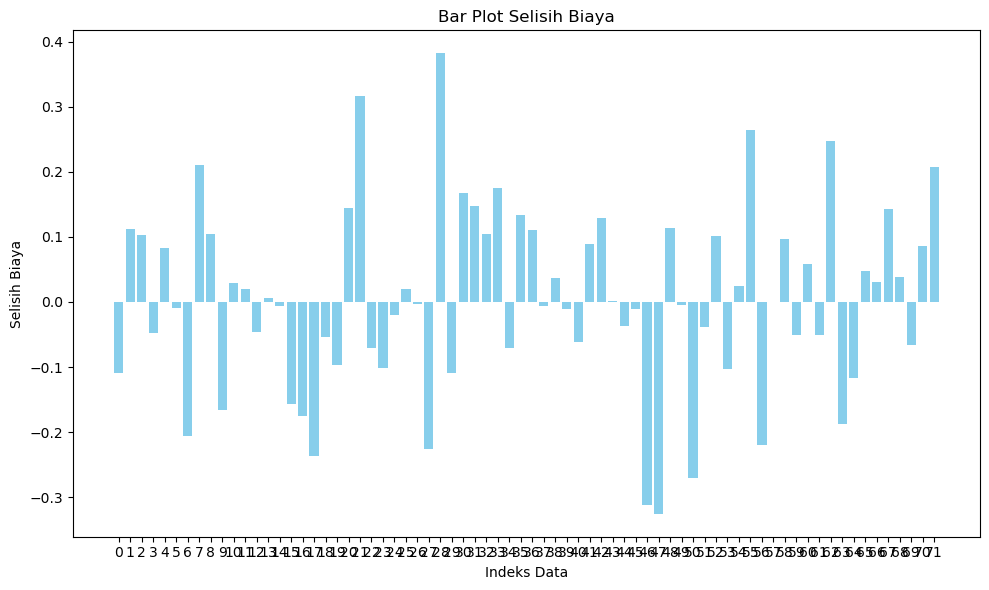

In [22]:
# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.bar(hasil.index, hasil['selisih biaya'], color='skyblue')
plt.xlabel('Indeks Data')
plt.ylabel('Selisih Biaya')
plt.title('Bar Plot Selisih Biaya')
plt.xticks(hasil.index)  # Mengatur label sumbu x sesuai indeks data
plt.tight_layout()
plt.show()

In [23]:
# periksa penurunan rata-rata biaya
hasil[hasil['selisih biaya'] < -0.30]

,source,destination,price,selisih biaya
46,North Station,Northeastern University,19.409576,-0.311887
47,North Station,South Station,15.231898,-0.325424


- Bedasarkan data kenaikan biaya perjalanan terbesar dari bulan Novemer - Desember adalah perjalanan yang mempunyai titik jemput di Financial District menuju Northeastern University dengan rata - rata selisih biaya sebesar 0.38 dolar.Dan terlihat juga rata - rata biaya perjalanan mengalami penurunan dari perjalanan yang mempunyai titik jemput di North Station menuju South Station.

- Saya ingin melihat kolerasi fitur apa yang menyebabkan kenaikan biaya perjalanan tersebut.Untuk itu saya ingin melakukan deep dive untuk mencari hubungan yang kuat yang bisa menaikan biaya perjalanan tersebut.

In [24]:
# Melihat bedasarkan jarak perjalanannya

x = data[(data['source'] == 'Financial District') & (data['destination'] == 'Northeastern University')]
x[['source','destination','distance']]

,source,destination,distance
251,Financial District,Northeastern University,3.28
515,Financial District,Northeastern University,7.46
516,Financial District,Northeastern University,7.46
564,Financial District,Northeastern University,3.30
565,Financial District,Northeastern University,3.30
...,...,...,...
692775,Financial District,Northeastern University,4.13
692776,Financial District,Northeastern University,4.13
692777,Financial District,Northeastern University,4.13
692778,Financial District,Northeastern University,4.13


In [25]:
# Menghitung rata-rata jarak
x['distance'].mean()

4.05707177729303

- Dan juga bedasarkan data dari perjalanan yang mempunyai titik jemput di North Station menuju South Station mempunyai jarak rata- rata sebesar 4 km

In [26]:
# Melihat biaya perjalanan terbesar dilihat dari tipe dan nama mobil,suhu,dan cuaca pada saat itu
types = x.groupby(['cab_type','name','temperature','short_summary']).agg({'price':'mean'})
types = types.reset_index()
types.sort_values(by='price', ascending=False)

,cab_type,name,temperature,short_summary,price
777,Lyft,Lux Black XL,45.18,Overcast,73.50
2139,Uber,Black SUV,41.46,Mostly Cloudy,71.00
2234,Uber,Black SUV,48.45,Overcast,59.50
692,Lyft,Lux Black XL,40.45,Light Rain,58.75
636,Lyft,Lux Black XL,37.11,Mostly Cloudy,56.00
...,...,...,...,...,...
2533,Uber,Taxi,53.51,Partly Cloudy,NaN
2534,Uber,Taxi,54.38,Mostly Cloudy,NaN
2535,Uber,Taxi,54.59,Mostly Cloudy,NaN
2536,Uber,Taxi,54.62,Overcast,NaN


- Bedasarkan data,ternyata jenis taksi lyft dengan nama mobil layanan yang digunakan adalah Lux Black XL dan keadaan cuaca saat itu lagi mendung dengan suhu temperature 45 derajat celcius(diasumsikan celcius derajatnya) mempunyai rata-rata biaya terbesar yang di keluarkan pelanggan pada saat itu.

In [27]:
# Memeriksa kolom name taxi terdapat pola null
null_data = types[types['name'] == 'Taxi']
null_data

,cab_type,name,temperature,short_summary,price
2256,Uber,Taxi,18.91,Clear,NaN
2257,Uber,Taxi,18.97,Clear,NaN
2258,Uber,Taxi,19.28,Clear,NaN
2259,Uber,Taxi,20.01,Partly Cloudy,NaN
2260,Uber,Taxi,20.07,Clear,NaN
...,...,...,...,...,...
2533,Uber,Taxi,53.51,Partly Cloudy,NaN
2534,Uber,Taxi,54.38,Mostly Cloudy,NaN
2535,Uber,Taxi,54.59,Mostly Cloudy,NaN
2536,Uber,Taxi,54.62,Overcast,NaN


In [28]:
# Periksa null data taxi
null_data['price'].isnull().sum()

282

In [29]:
# Periksa total null seluruh data
data['price'].isnull().sum()

55095

In [30]:
# Persentasi missing value
data['price'].isnull().sum()*100/len(data)

7.949402009317948

- Terlihat bahwa keseluruhan data mempunyai missing valuenya sudah lebih dari 5 %.Jadi kita bisa melakukan handling missing value dengan imputasi median karena distribusi datanya tidak normal pada saat kita sudah melakukan split data.

# Feature Engineering

## Feature Creation

### Cardinality

Saya akan melakukan cardinality pada kolom yang bertipe kategorikal saja.Menurut saya untuk kolom numerik tidak cocok pada kasus ini untuk dilakukan kardinalitas karena memuat informasi yang berpengaruh terhadap variabel target kita yaitu harga.contohnya seperti jarak perjalanan apabila kita cardinality kan maka informasi jarak yang kita butuhkan untuk mengetahui biaya perjalanan akan menghilang.

In [31]:
# periksa nilai unik pada data

for i in cat_data.columns:
    print(f'cardinality kolom {i}:', cat_data[i].nunique())

cardinality kolom id: 693071
cardinality kolom timestamp: 36179
cardinality kolom month: 2
cardinality kolom timezone: 1
cardinality kolom source: 12
cardinality kolom destination: 12
cardinality kolom cab_type: 2
cardinality kolom product_id: 13
cardinality kolom name: 13
cardinality kolom surge_multiplier: 7
cardinality kolom short_summary: 9
cardinality kolom long_summary: 11
cardinality kolom uvIndex: 3
cardinality kolom icon: 7


In [32]:
# Menghapus data yang mempunyai high cardinality
del data['id']
del data['timestamp']
del data['product_id']
del data['timezone']

Keterangan :

- Saya memutuskan menghapus kolom yang mempunyai nilai unik yang sangat besar yang dikenal sebagai istilah high cardinality.Saya akan menghapus kolom ini 
- Saya juga menghapus kolom product_id karena nilai unik produk sudah terwakilkan dengan tipe produk mobilnya.dan juga pada di kolom product_id terdapat nama merek mobil yang seharusnya pada kolom ini harusnya berisi kode unik identifikasi layanan saja.
- Saya menghapus kolom timezone karena menurut saya kolom waktu itu tidak memuat banyak informasi dan mungkin apabila di cari korelasinya akan menjadi bias.


**Pengecekan kolom yang mempunyai nilai unik lebih dari 10**

Tidak terdapat kolom yang bisa saya ringkaskan karena informasi ini sudah menjadi kebutuhan bisnis kita

## Data preprocessing

In [33]:
#split fitur dan target
X= data.drop('price', axis=1) #fitur
y= data['price'] #target

In [34]:
#pisahkan menjadi train dan test
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2,
                                                  random_state=10
                                                   )

In [35]:
# cetak ukuran data
print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (554456, 51)
Test Size  :  (138615, 51)
Train Size :  (554456,)
Test Size  :  (138615,)


Saya membagi data train 80% dan data test 20%.Dikarenakan jumlah entries dataset saya cukup besar maka saya memutuskan untuk melakukan split data seperti itu.

## Feature Selection

- Saya akan memeriksa kolerasi dari seluruh data numerikal dengan variabel target harga.
- Saya akan memeriksa kolerasi dari seluruh data kategorikal dengan variabel target harga.

### Perlakuan terhadap X train

#### Korelasi numerikal data

**Mencari hubungan korelasi**

In [36]:
# Melihat isi data train
X_train.head(1)

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,latitude,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
547509,7,14,12,Haymarket Square,West End,Uber,Taxi,0.62,1.0,42.3519,...,0.0,1544806800,27.18,1544781600,46.65,1544814000,24.51,1544785200,43.86,1544817600


In [37]:
# Membuat variabel untuk mencari kolerasi data numerikal saja
corr_num = X_train

In [38]:
# Periksa datanya
corr_num.head(1)

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,latitude,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
547509,7,14,12,Haymarket Square,West End,Uber,Taxi,0.62,1.0,42.3519,...,0.0,1544806800,27.18,1544781600,46.65,1544814000,24.51,1544785200,43.86,1544817600


In [39]:
# List kolom kategorikal yang ingin dihapus
kolom_kategorikal = [ 'month', 'source', 'destination', 'cab_type', 
                    'name', 'surge_multiplier', 'short_summary', 'long_summary', 
                     'uvIndex', 'icon']
# Menghapus kolom kategorikal dari DataFrame
corr_num = corr_num.drop(columns=kolom_kategorikal)

In [40]:
# Menambahkan kolom baru price untuk di kolerasi menggunakan heatmap dengan fitur
corr_num['price'] = y_train

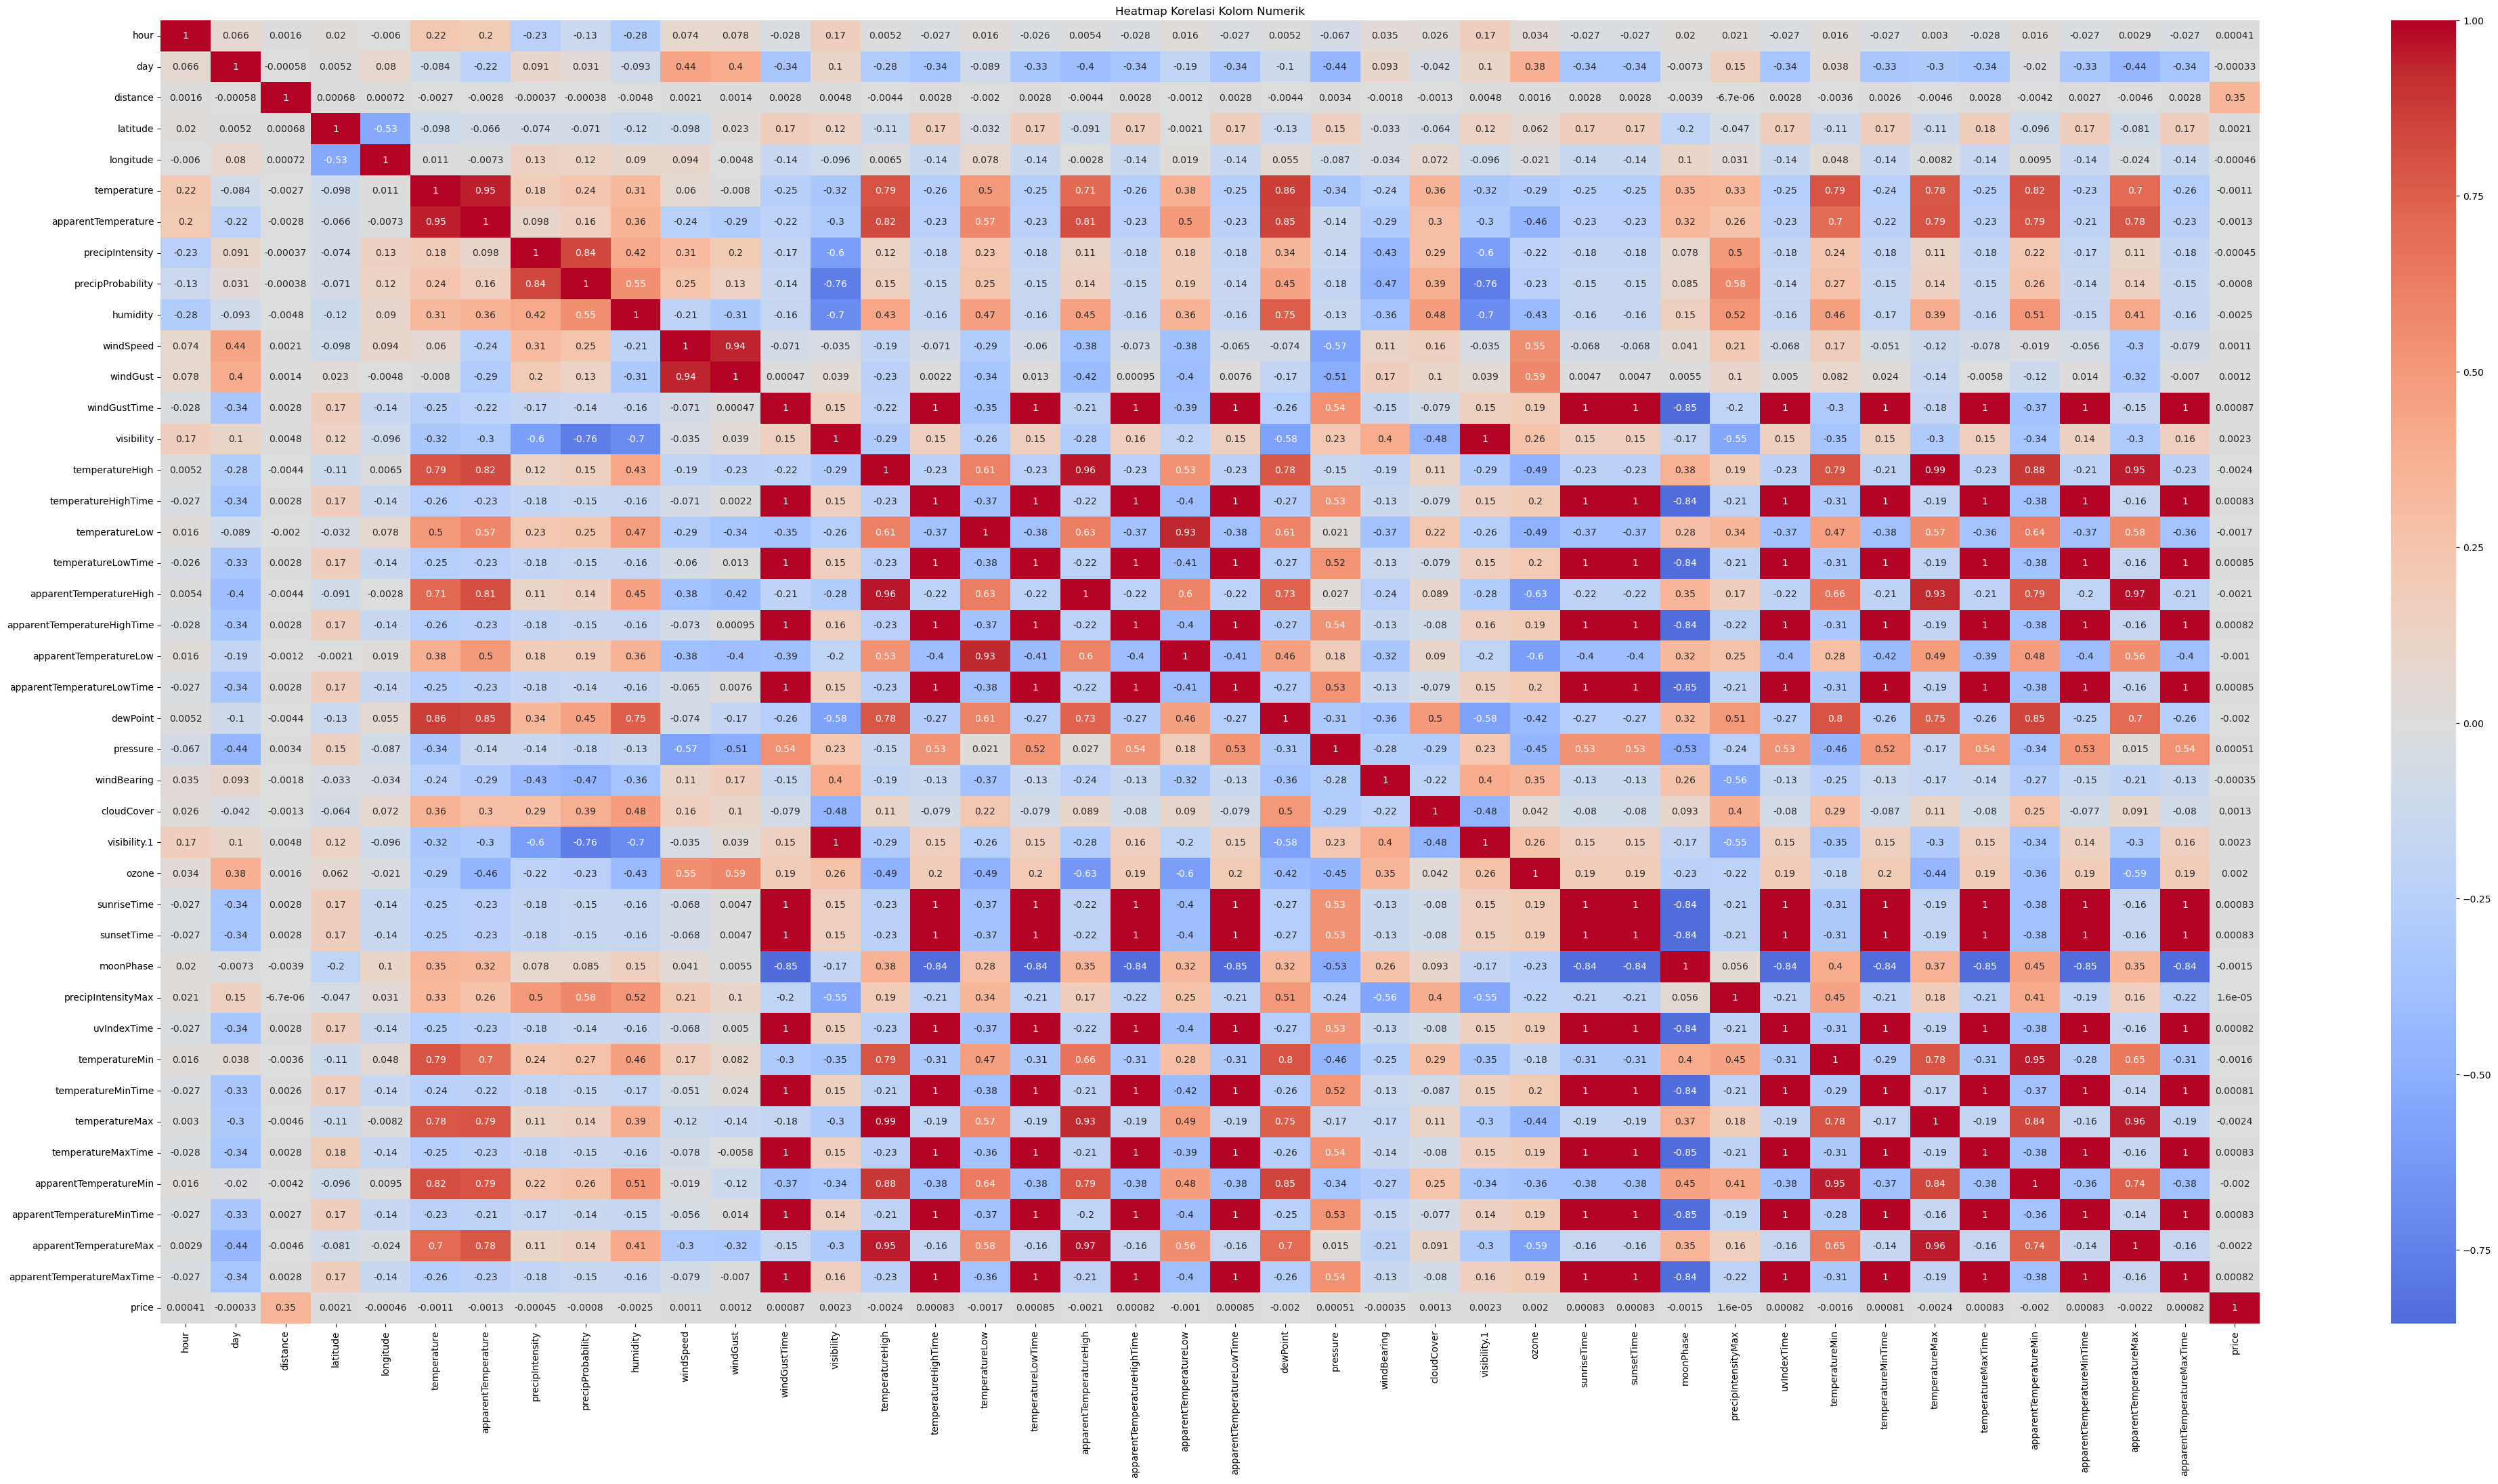

In [41]:
# cari kolerasinya 
corr_data_num  = corr_num.corr()

# Membuat heatmap korelasi dengan ukuran gambar yang besar
plt.figure(figsize=(50, 25))
sns.heatmap(corr_data_num, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi Kolom Numerik')
plt.show()

ketika di zoom

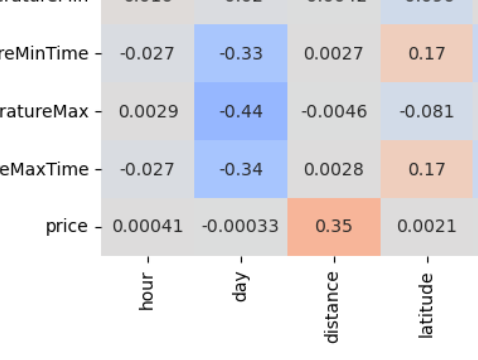

Harga -> Total jarak perjalanan dalam satuan mil (hubungan kolerasi positif yang cukup tinggi = 0.35)

Kesimpulan:
- Terlihat bedasarkan data bahwa apabila jarak pada pejalanan yang akan di tempuh penumpang semakin jauh maka biaya perjalanan yang akan di keluarkan penumpang akan semakin besar.

#### Korelasi kategorikal data

Kita bisa melakukan korelasi kendall untuk melihat hubungan korelasi antara data kategorikal dengan numerikal

In [42]:
# Menghapus kolom yang saya tidak pakai
del cat_col['id']
del cat_col['timestamp']
del cat_col['product_id']
cat_col.columns

Index(['month', 'timezone', 'source', 'destination', 'cab_type', 'name',
       'surge_multiplier', 'short_summary', 'long_summary', 'uvIndex', 'icon'],
      dtype='object')

In [43]:
# Membuat variabel untuk data kategorikal saja
corr_cat = X_train

In [44]:
# Melihat isi data numerikal
num_data.columns

Index(['hour', 'day', 'price', 'distance', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust',
       'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime',
       'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime',
       'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'],
      dtype='object')

In [45]:
# untuk menghapus tabel price
cols  = num_data
del cols['price']

# untuk mengambil list data numerik
col = cols.columns

corr_cat = corr_cat.drop(columns = col)

Untuk mempersiapkan tabel kategorikal saja.Saya membuat nya dengan mengambil keseluruhan data x train,lalu drop data numerikal saja kemudian sisanya itu data kategorikal yang akan saya periksa korelasinya.

In [46]:
# periksa data
corr_cat.head(1)

,month,source,destination,cab_type,name,surge_multiplier,short_summary,long_summary,icon,uvIndex
547509,12,Haymarket Square,West End,Uber,Taxi,1.0,Overcast,Partly cloudy throughout the day.,cloudy,0


In [47]:
# ubah y train kedalam dataframe untuk di kolerasikan dengan data kategorikal
y_train = pd.DataFrame(y_train)
y_train.head()

,price
547509,NaN
567115,8.0
626337,10.5
219186,22.5
193414,7.0


In [48]:
# Menghitung korelasi menggunakan metode Kendall
def compute_corr(col):
    corr_kendall = corr_cat[col].corr(y_train['price'], method='kendall')
    print('Nama kolom: ',col)
    print('Kendall Tau:', corr_kendall)

# Memanggil fungsi untuk setiap kolom yang ingin dianalisis
for column in corr_cat.columns:
    compute_corr(column)

Nama kolom:  month
Kendall Tau: 0.0001965461327319953
Nama kolom:  source
Kendall Tau: -0.013212338738053442
Nama kolom:  destination
Kendall Tau: -0.03238382770410845
Nama kolom:  cab_type
Kendall Tau: -0.05815612126380232
Nama kolom:  name
Kendall Tau: -0.3974435008805957
Nama kolom:  surge_multiplier
Kendall Tau: 0.13741106909475054
Nama kolom:  short_summary
Kendall Tau: 0.000300689392327392
Nama kolom:  long_summary
Kendall Tau: 0.0011191359076274884
Nama kolom:  icon
Kendall Tau: 0.0011219030187883173
Nama kolom:  uvIndex
Kendall Tau: 3.8212937809887594e-05


- Harga -> kenaikan intensif harga di kondisi tertentu sesuai dengan level kebutuhan transportasi

(hubungan kolerasi positif yang cukup tinggi = 0.14)

- Harga -> nama mobil layanan yang digunakan

(hubungan kolerasi negatif yang cukup tinggi = -0.4)

Kesimpulan:
- Terlihat bedasarkan data semakin urgent kondisi dimana pelanggan sangat membutuhkan transportasi untuk mereka tumpangi maka biaya perjalanan yang akan di keluarkan penumpang akan semakin besar.
- Kemudian bedasarkan data terdapat cukup banyak hubungan berlawanan antara nama mobil yang ditumpangi.faktor yang mungkin dapat menjelaskan mengapa terjadi korelasi negatif antara harga dan nama mobil layanan adalah
tingkat Layanannya. Berbagai jenis layanan transportasi memiliki tingkat layanan yang berbeda. Layanan premium atau mewah seperti "Lux Black" atau "Black SUV" cenderung memiliki tarif yang lebih tinggi daripada layanan biasa seperti "UberX" atau "Taxi". Oleh karena itu, ketika orang memilih layanan dengan tarif lebih tinggi, harga akan naik, tetapi jenis layanan yang lebih mahal ini akan cenderung memiliki nilai "nama mobil layanan yang digunakan" yang lebih rendah.

### Kesimpulan Feature selection

Jadi fitur yang akan saya masukan kedalam model adalah fitur :

- distance
- name
- surge_multiplier

Saya mengambil ketiga fitur diatas kedalam model karena fitur tersebut mempunyai hubungan kolerasi yang cukup tinggi terhadap variabel target saya

### Membuat kolom yang dibutuhkan

In [49]:
# Mengambil kolom yang dibutuhkan saja
X_train = X_train[['name','distance','surge_multiplier']]
X_test = X_test[['name','distance','surge_multiplier']]

# Feature Transformation

## Handling Missing Values

In [50]:
X_train.isnull().sum()

name                0
distance            0
surge_multiplier    0
dtype: int64

In [51]:
y_train.isnull().sum()

price    44135
dtype: int64

In [52]:
# periksa distribusi data
y_train.skew()

price    1.044147
dtype: float64

In [53]:
# jadikan y test sebagai dataframe
y_test = pd.DataFrame(y_test)

In [54]:
y_test.skew()

price    1.05213
dtype: float64

Terlihat terdapat missing value pada variabel target harga.Pada EDA terlihat bahwa missing value lebih dari 5 %.Dan saya akan melakukan imputasi missing value menggunakan median karena distribusi datanya tidak normal (nilai skewness > 1,skew positive)

In [55]:
# Membuat SimpleImputer untuk imputasi median
imputer = SimpleImputer(strategy='median')

# Melakukan imputasi median pada data
y_train_imputed = imputer.fit_transform(y_train)
y_test_imputed = imputer.transform(y_test)
# Menampilkan data setelah imputasi
y_train_imputed

array([[13.5],
       [ 8. ],
       [10.5],
       ...,
       [16. ],
       [11.5],
       [13.5]])

**membuat dataframe**

In [56]:
y_train_imputed = pd.DataFrame(y_train_imputed)

change = {0:'price'}

y_train_imputed = y_train_imputed.rename(columns = change)
y_train_imputed.head(1)

,price
0,13.5


In [57]:
y_test_imputed = pd.DataFrame(y_test_imputed)

change1 = {0:'price'}

y_test_imputed = y_test_imputed.rename(columns = change1)
y_test_imputed.head(1)

,price
0,13.5


In [58]:
y_train_imputed.isnull().sum()

price    0
dtype: int64

In [59]:
y_test_imputed.isnull().sum()

price    0
dtype: int64

Saya membuat dataframe untuk masing-masing variabel yang telah diimputasi untuk memudahkan saya untuk melakukan concat pandas dataframe

- Data sudah tidak ada missing values

## Handling Outlier

In [60]:
# Cek distribusi data
X_train['distance'].skew()

0.8360620556732666

Terlihat bahwa distribusi data distance normal.Untuk yang berdistribusi normal kita bisa melakukan handling menggunakan metode Z-score.

Saya akan melakukan handling outlier dengan metode caping karena menurut saya capping akan membuat model saya bagus di dataset ini karena saya sudah mencoba dengan melakukan trimming hasil model tidak sebagus capping untuk dataset dan fitur-fitur yang saya gunakan saat ini.

In [61]:
# caping outlier

winsoriser_price = Winsorizer(capping_method='gaussian',
                             tail='both',
                             fold=3,
                             variables=['distance'])

X_train_capped = winsoriser_price.fit_transform(X_train)
X_test_capped = winsoriser_price.transform(X_test)

In [62]:
# Fungsi untuk membuat histogram dan box plot

def diagnostic_plots(df, variable):
    # Definisikan figure size
    plt.figure(figsize=(16, 4))

    # membuat Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # membuat Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Data latih
distance - Before Capping


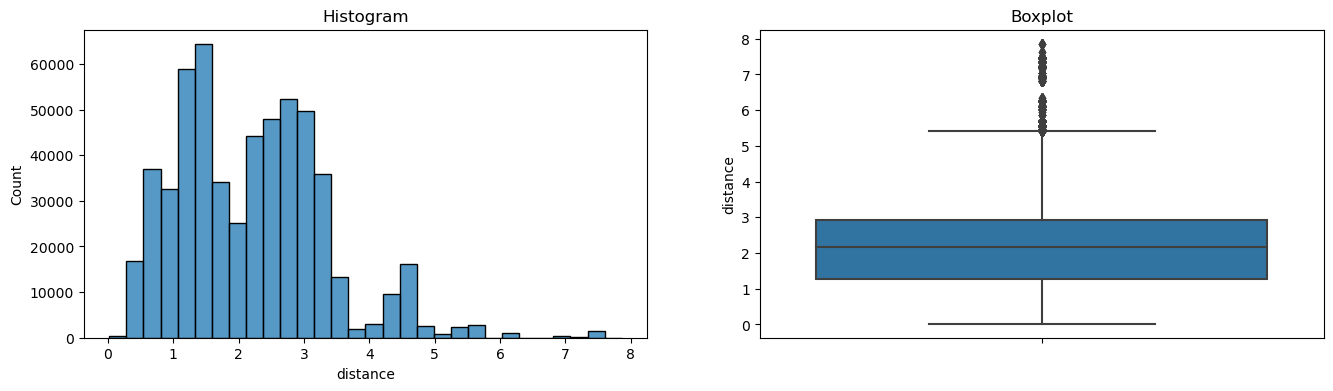


distance - After Capping


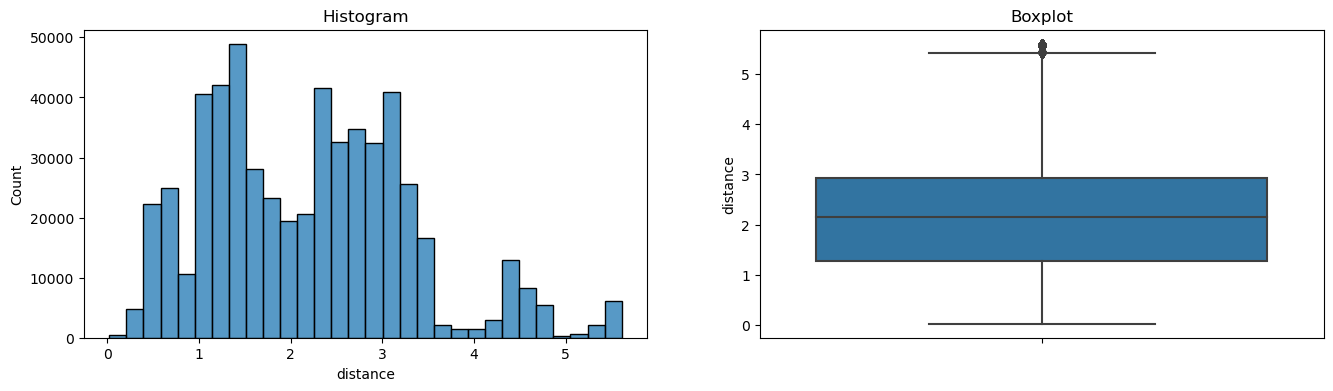

Data test
distance - Before Capping


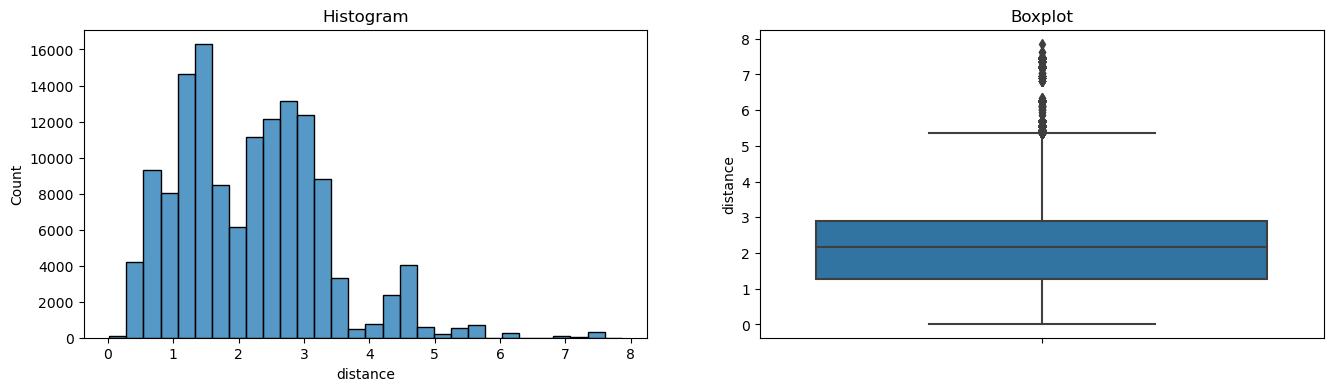


distance - After Capping


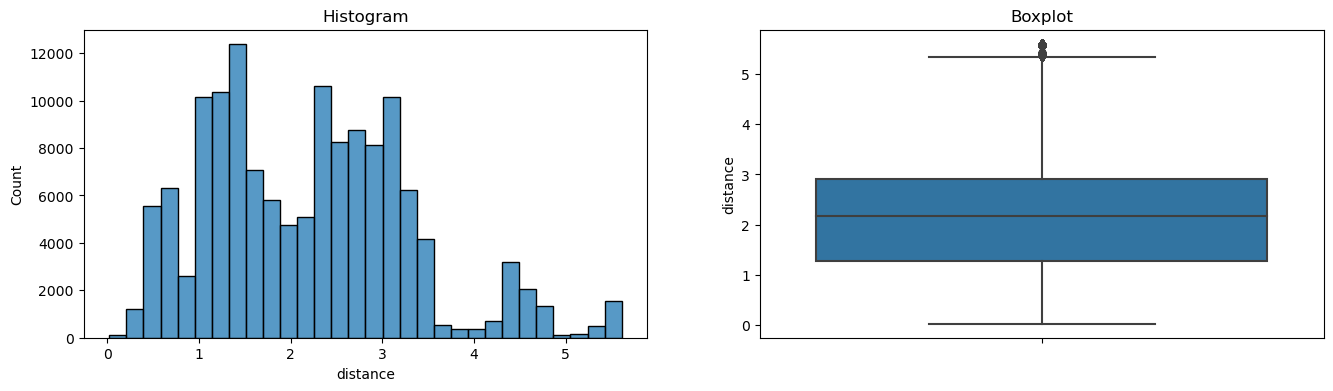

In [63]:
# Memeriksa distribusi sebelum dan sesudah capping
print('Data latih')
print('distance - Before Capping')
diagnostic_plots(X_train, 'distance')

print('\ndistance - After Capping')
diagnostic_plots(X_train_capped, 'distance')

print('Data test')
print('distance - Before Capping')
diagnostic_plots(X_test, 'distance')

print('\ndistance - After Capping')
diagnostic_plots(X_test_capped, 'distance')

Terlihat pada gambar metode capping membuat distribusi data kita semakin normal.Metode ini baik untuk membuat model kita menjadi good fit

In [64]:
# Periksa data X train yang sudah di capping
X_train_capped

,name,distance,surge_multiplier
547509,Taxi,0.62,1.0
567115,UberPool,2.27,1.0
626337,Lyft,2.00,1.0
219186,Lyft XL,3.98,1.0
193414,Lyft,1.49,1.0
...,...,...,...
533660,UberXL,1.64,1.0
105595,Black SUV,0.92,1.0
617841,UberXL,2.66,1.0
443712,UberX,2.98,1.0


Outlier sudah saya capping

## Feature Scaling

In [65]:
X_train_capped['distance'].skew()

0.6230165572853916

In [66]:
X_test_capped['distance'].skew()

0.6230282519648227

Fitur kita berdistribusi normal kita bisa melakukan scaling menggunakan standartscaler

In [67]:
# Membuat variabel baru untuk memasukan hasil scaling 
X_train_num = X_train_capped['distance']
X_test_num = X_test_capped['distance']

In [68]:
# ubah dalam bentuk dataframe karena metode scaling harus berbentuk dataframe datanya
X_train_num = pd.DataFrame(X_train_num)
X_test_num = pd.DataFrame(X_test_num)
X_train_num

,distance
547509,0.62
567115,2.27
626337,2.00
219186,3.98
193414,1.49
...,...
533660,1.64
105595,0.92
617841,2.66
443712,2.98


In [69]:
X_test_num

,distance
479078,0.91
686860,2.14
314265,1.08
442796,0.57
521075,1.08
...,...
396162,3.29
249471,2.15
290442,1.63
135977,1.25


In [70]:
# karena distribusi normal jadi saya pakai metode standartscaler
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [71]:
# Ubah dalam bentuk dataframe karena hasil dari scaling itu array 1 dimensi
X_train_num_scaled = pd.DataFrame(X_train_num_scaled)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled)

nama_kolom = { 0: 'distance'}

X_train_num_scaled = X_train_num_scaled.rename(columns = nama_kolom )
X_test_num_scaled = X_test_num_scaled.rename(columns = nama_kolom )

In [72]:
# periksa data X train hasil scaling
X_train_num_scaled

,distance
0,-1.405905
1,0.079055
2,-0.163939
3,1.618013
4,-0.622926
...,...
554451,-0.487930
554452,-1.135912
554453,0.430045
554454,0.718037


In [73]:
# Periksa data X test hasil scaling
X_test_num_scaled

,distance
0,-1.144912
1,-0.037942
2,-0.991916
3,-1.450904
4,-0.991916
...,...
138610,0.997030
138611,-0.028942
138612,-0.496930
138613,-0.838921


Saya melakukan scaling karena untuk meningkatkan performa model ,padahal kolom numerikal hanya satu tetapi saya mencobanya agar model lebih baik

## Feature Encoding

In [74]:
# periksa value kolom
X_train['name'].value_counts()

UberX           44204
Taxi            44135
UberPool        44108
Black SUV       44038
WAV             44024
UberXL          43983
Black           43977
Lyft XL         41142
Lux Black       41041
Lyft            41015
Lux Black XL    40979
Lux             40969
Shared          40841
Name: name, dtype: int64

In [75]:
# periksa value kolom
X_train['surge_multiplier'].value_counts()

1.00    537605
1.25      8908
1.50      4051
1.75      1942
2.00      1813
2.50       127
3.00        10
Name: surge_multiplier, dtype: int64

Saya mempunyai dua kolom kategorikal yaitu name dan surge_multiplier.Untuk name itu adalah data nominal karena tidak ada tingkatan level.Kemudian untuk kolom surge_multiplier itu adalah kolom ordinal. Dalam kasus ini, nilai surge_multiplier menunjukkan tingkat kenaikan tarif relatif terhadap tarif dasar, dan nilai-nilai ini memiliki urutan yang berarti (misalnya, 1.00 adalah tanpa kenaikan, 1.25 memiliki kenaikan lebih rendah daripada 1.50, dan seterusnya).

Saya akan melakukan encoding untuk kolom nominal dengan metode one hot encoding.Kemudian saya akan melakukan encoding untuk kolom surge_multiplier dengan metode ordinal encoding untuk mendapatakan model yang akurat nantinya.

Catatan:
karena kolom surge multiplier sudah bentuk angka jadi saya tidak melakukan encoding lagi

In [76]:
# Membuat variabel baru untuk di encoding
X_train_nominal = X_train['name']
X_test_nominal = X_test['name']

In [77]:
# ubah dalam bentuk dataframe karena metode OneHotEncoder harus dalam bentuk dataframe data yang akan kita masukan
X_train_nominal = pd.DataFrame(X_train_nominal)
X_test_nominal = pd.DataFrame(X_test_nominal)
X_train_nominal

,name
547509,Taxi
567115,UberPool
626337,Lyft
219186,Lyft XL
193414,Lyft
...,...
533660,UberXL
105595,Black SUV
617841,UberXL
443712,UberX


In [78]:
#terapkan OneHotEncoder ke fitur 'region'

cat_ohe= ['name']
encoder= OneHotEncoder(sparse=False) #array

encoder.fit(X_train[cat_ohe])
X_train_ohe= encoder.transform(X_train[cat_ohe])
X_test_ohe= encoder.transform(X_test[cat_ohe])

In [79]:
# Periksa data X train
X_train_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [80]:
feature_names= encoder.get_feature_names_out(input_features= cat_ohe)

X_train_ohe= pd.DataFrame(X_train_ohe, columns=feature_names)
X_test_ohe= pd.DataFrame(X_test_ohe, columns=feature_names)

X_train_ohe

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
554451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
554452,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
554453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
554454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [81]:
# Periksa data X test
X_test_ohe

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138610,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138611,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
138613,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Concate between Numerical Columns and Categorical Columns

In [82]:
# Membuat variabel yang berisi kolom df surge_multiplier
X_train_surge = pd.DataFrame(X_train['surge_multiplier'])
X_train_surge = X_train_surge.reset_index(drop=True)

X_test_surge = pd.DataFrame(X_test['surge_multiplier'])
X_test_surge = X_test_surge.reset_index(drop=True)

In [83]:
# Menggabungkan ketiga DataFrame yang sudah kita transformasikan fiturnya
X_train_final = pd.concat([X_train_num_scaled, X_train_ohe,X_train_surge], axis=1)
X_test_final = pd.concat([X_test_num_scaled, X_test_ohe,X_test_surge], axis=1)

In [84]:
X_train_final

,distance,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,surge_multiplier
0,-1.405905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.079055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.163939,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.618013,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.622926,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554451,-0.487930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
554452,-1.135912,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
554453,0.430045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
554454,0.718037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [85]:
# lihat data y train
y_train_imputed


,price
0,13.5
1,8.0
2,10.5
3,22.5
4,7.0
...,...
554451,13.0
554452,27.5
554453,16.0
554454,11.5


In [86]:
# lihat data y test
y_test_imputed 

,price
0,13.5
1,27.5
2,6.5
3,9.0
4,7.0
...,...
138610,22.5
138611,19.5
138612,8.5
138613,13.5


Penting untuk mempertimbangkan apakah kita perlu melakukan penskalaan pada target variabel (y) saat kita membangun model regresi. Secara umum, dalam regresi, penskalaan y tidak diperlukan atau umum dilakukan, terutama jika kita menggunakan algoritma regresi linear yang umum seperti Regresi Linier Biasa (Ordinary Least Squares).

Alasan utamanya adalah bahwa dalam regresi linear, koefisien regresi (slope) yang dihitung oleh model akan disesuaikan dengan perubahan dalam satuan y. Jika kita melakukan penskalaan pada y, itu hanya akan mengubah besaran skala, tetapi tidak akan mempengaruhi hubungan relatif antara variabel-variabel independen (X) dan variabel dependen (y).

# Uji Asumsi Linear Regression

Untuk mengetahui apakah fitur yang kita seleksi memenuhi Asumsi Linear Regresi atau tidak.

## 1.Linear Relationship

Hubungan antara fitur distance dengan terget price

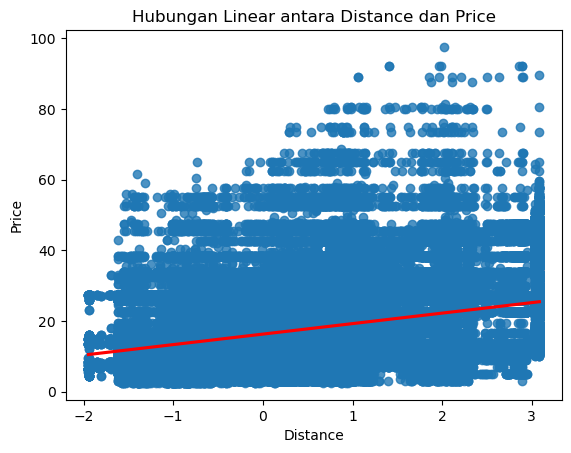

In [87]:
# Menggabungkan X_train_final dan y_train_imputed menggunakan pd.concat
concatenated_data = pd.concat([X_train_final, y_train_imputed], axis=1)

# Membuat plot regresi linier dengan garis regresi
# Membuat plot regresi linier dengan garis merah
sns.regplot(x='distance', y='price', data=concatenated_data, ci=None, line_kws={'color': 'red'})

plt.title('Hubungan Linear antara Distance dan Price')
plt.xlabel('Distance')
plt.ylabel('Price')

plt.show()

Hubungan antara fitur surge_multiplier dan target price

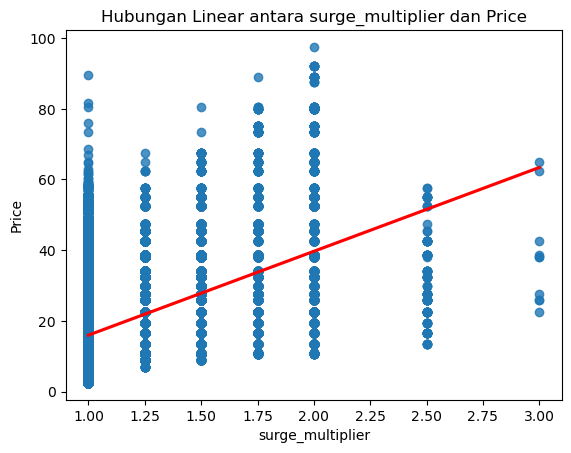

In [88]:
# Menggabungkan X_train_final dan y_train_imputed menggunakan pd.concat
concatenated_data = pd.concat([X_train_final, y_train_imputed], axis=1)

# Membuat plot regresi linier dengan garis regresi
# Membuat plot regresi linier dengan garis merah
sns.regplot(x='surge_multiplier', y='price', data=concatenated_data, ci=None, line_kws={'color': 'red'})

plt.title('Hubungan Linear antara surge_multiplier dan Price')
plt.xlabel('surge_multiplier')
plt.ylabel('Price')

plt.show()

Terlihat dari visualisasi regresi plot diatas bahwa terdapat hubungan linear dari 2 gambar tersebut,namun tidak terlihat jelas pola linearnya dikarenakan nilai korelas nya lemah dari 2 gambar tersebut.Dapat disimpulkan bahwa fitur ini memenuhi asumsi linear relationship tetapi hubungannya lemah.

## 2.No or Little Multicollinearity

**Cara pengecekannya :** saya akan menggunakan Variance Inflation Factor (VIF).

In [89]:
# Membuat fungsi untuk menghitung Variance Inflation Factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [90]:
# saya tidak memasukan kolom name karena menggunakan metode one hot encoding

# Define kolom yang dibutuhkan
data_VIF = X_train_final[['distance','surge_multiplier']]

In [91]:
# Check Multicolinearity in X

calc_vif(data_VIF)

,variables,VIF
0,distance,1.000006
1,surge_multiplier,1.000006


karena nilai VIF kurang dari 5, Maka fitur yang saya pakai tidak ada hubungan antar fitur.Maka tidak ada multikolinearitas antara fitur ini.Asumsi ini terpenuhi.

Kesimpulan:

Untuk menjawab pertanyaan dari masalah bisnis saya.Dengan menggunakan data ini saya bisa menggunakan metode linear regresi untuk model dataset ini karena 2 asumsi sudah terpenuhi saya rasa cukup kuat untuk konteks bisnis saya.Dan dari model saya ini bisa digunakan untuk memprediksi biaya perjalanan yang dipengaruhi oleh jarak perjalanan dan nama mobil yang dipakai pelanggan yang nantinya bisa menaikan 5% pendapatan perusahaan karena prediksi pada model kita itu bagus

# Model Definition

In [92]:
# Mendefinisikan model yang akan kita pakai
model_lin_reg = LinearRegression()

Dikarenakan atasan meminta saya melakukan prediksi dengan model linear regresi maka saya akan mencari model yang terbaiknya

# Model Training

In [93]:
# Latih model kita

model_lin_reg.fit(X_train_final, y_train_imputed)

LinearRegression()

# Model Evaluation

In [94]:
# Hasil prediksi data latih dan data test kita

y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

y_pred_train

array([[ 9.40026093],
       [ 8.99490356],
       [ 8.4250946 ],
       ...,
       [16.93920135],
       [11.87181854],
       [14.9671936 ]])

**Mengubah data kedalam dataframe untuk memudahkan kita dalam membaca isi data dan juga agar bisa dilakukan pengecekan model evaluasi karena pengecekan tersebut harus dalam bentuk dataframe**

In [95]:
y_pred_train_df = pd.DataFrame(y_pred_train)
y_pred_train_df

,0
0,9.400261
1,8.994904
2,8.425095
3,19.326347
4,7.084129
...,...
554451,14.257271
554452,26.992432
554453,16.939201
554454,11.871819


In [96]:
y_pred_test_df = pd.DataFrame(y_pred_test)
y_pred_test_df

,0
0,10.162766
1,31.502899
2,5.865990
3,10.360298
4,6.006104
...,...
138610,19.995064
138611,16.997620
138612,8.322212
138613,14.631210


In [97]:
# Hasil evaluasi model kita menggunakan MAE

print('Error Train-Set (MAE) : ', mean_absolute_error(y_train_imputed, y_pred_train))
print('Error Test-Set (MAE) : ', mean_absolute_error(y_test_imputed, y_pred_test))

# Hasil evaluasi model kita menggunakan MSE
print('MSE train = ', mean_squared_error(y_train_imputed, y_pred_train))
print('MSE test = ', mean_squared_error(y_test_imputed, y_pred_test))

# Hasil evaluasi model kita menggunakan RMSE
print('RMSE train = ', np.sqrt(mean_squared_error(y_train_imputed, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test_imputed, y_pred_test)))

# Hasil evaluasi model kita menggunakan R2 score
print('r2score train = ', r2_score(y_train_imputed, y_pred_train))
print('r2score test = ', r2_score(y_test_imputed, y_pred_test))

# Hasil evaluasi model kita menggunakan MAPE
print('MAPE train = ', np.round(mean_absolute_percentage_error(y_train_imputed, y_pred_train)*100))
print('MAPE train = ', np.round(mean_absolute_percentage_error(y_test_imputed, y_pred_test)*100))

Error Train-Set (MAE) :  1.8207471521440777
Error Test-Set (MAE) :  1.8244508848096395
MSE train =  6.542380829053582
MSE test =  6.599350153557388
RMSE train =  2.5578078170678857
RMSE test =  2.568920036427251
r2score train =  0.9188919670568109
r2score test =  0.918428499177362
MAPE train =  13.0
MAPE train =  13.0


In [98]:
data['price'].mean()

16.545125490614065

Rata-rata Harga yang Asli: 16.55: Dengan RMSE sekitar 2.57 pada data uji, kita bisa mengatakan bahwa kesalahan prediksi harga oleh model berkisar sekitar ±2.57 dari harga asli.

# Kesimpulan Analisis model
Hasil evaluasi yang saya berikan merupakan hasil dari pengujian model regresi saya pada data pelatihan (train-set) dan data pengujian (test-set). Mari kita analisis setiap metrik evaluasi yang saya berikan:

1. Mean Absolute Error (MAE):

- Train-Set MAE: 1.8207
- Test-Set MAE: 1.8245
- MAE mengukur rata-rata absolut dari selisih antara nilai aktual dan nilai prediksi. Semakin rendah nilai MAE, semakin baik kualitas prediksi. Hasil saya menunjukkan bahwa model memiliki MAE yang hampir sama baiknya antara data pelatihan dan pengujian. Ini menunjukkan bahwa model saya secara konsisten memberikan prediksi yang dekat dengan nilai aktual.Dan juga nilai test nya lebih baik dari pada train itu faktor pendukungnya model saya bisa dikatakan bagus.
Mean Squared Error (MSE):

2. Train-Set MSE: 6.5424
Test-Set MSE: 6.5994
MSE mengukur rata-rata dari kuadrat selisih antara nilai aktual dan nilai prediksi. Semakin rendah nilai MSE, semakin baik performa model. Hasil saya menunjukkan bahwa MSE pada data pelatihan dan pengujian relatif dekat, menunjukkan konsistensi kinerja model di kedua set data.
Root Mean Squared Error (RMSE):

3. Train-Set RMSE: 2.5578
Test-Set RMSE: 2.5689
RMSE adalah akar kuadrat dari MSE. Ini mengukur tingkat kesalahan rata-rata prediksi dalam satuan yang sama dengan variabel target. Nilai RMSE yang rendah menunjukkan bahwa model memiliki performa yang baik dalam mengestimasi nilai target.
Coefficient of Determination (R-squared or R2 Score):

4. Train-Set R2 Score: 0.9189
Test-Set R2 Score: 0.9184
R2 Score mengukur seberapa baik variasi dalam variabel target dijelaskan oleh model. Nilai R2 Score berkisar dari 0 hingga 1, dengan nilai lebih tinggi menunjukkan model yang lebih baik dalam menjelaskan variasi data. Hasil saya menunjukkan bahwa model saya memiliki kemampuan yang sangat baik dalam menjelaskan variasi dalam data, baik pada data pelatihan maupun pengujian.
Mean Absolute Percentage Error (MAPE):

5. Train-Set MAPE: 13.0
Test-Set MAPE: 13.0
MAPE mengukur persentase rata-rata dari selisih absolut antara nilai aktual dan nilai prediksi dalam bentuk persentase. Semakin rendah nilai MAPE, semakin baik model dalam mengestimasi. Hasil saya menunjukkan bahwa model memiliki MAPE yang sama pada kedua set data, menunjukkan konsistensi dalam estimasi persentase kesalahan.


Secara keseluruhan, hasil evaluasi menunjukkan bahwa model regresi saya memiliki performa yang baik dan konsisten dalam melakukan prediksi pada kedua set data (pelatihan dan pengujian). Skor yang tinggi pada metrik evaluasi menunjukkan bahwa model saya adalah pendekatan yang baik dalam menggambarkan hubungan antara fitur dan variabel target dalam dataset saya.

# Model Saving

In [99]:
# Untuk menyimpan model kita menggunakan module pickle

with open('model_scaler1.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1) # ini agar di ipynb data inference kita tinggal transform saja

with open('model_encoder1.pkl', 'wb') as file_2:
  pickle.dump(encoder, file_2) # ini agar di ipynb data inference kita tinggal transform saja

with open('model_lin_reg1.pkl', 'wb') as file_3:
  pickle.dump(model_lin_reg, file_3) # ini agar di ipynb data inference kita tinggal transform saja

- Alasan saya tidak membuat method list function numerikal dan kategorikal karna terkadang ada data yang tidak sesuai.Hal ini seperti data surge_multiplier ternyata data ini adalah data kategorikal tetapi python mengira data ini data numerikal.
Jadi saya akan buat variabel sendiri pada notebook di data inference nanti.

- Saya akan membuat notebook baru untuk data inference dengan file data_inference_GC4.ipynb.
Karena menurut instruktur rahman itu sangat disarankan agar kita lebih mudah membaca data prediksi kita